<a href="https://colab.research.google.com/github/BlackCurrantDS/ATiML-Project/blob/master/Model_Selection_and_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook, runs the model selection and evaluation on scaled feature set, first runs PCA as per previous PCA analysis

Reads data

In [ ]:
import pandas as pd
import numpy as np

TRaining data

In [ ]:
train_data = pd.read_csv("features_scaled_train.csv", index_col=0)

In [ ]:
train_data.head(1)

,ID,book_lenght,book_sen,book_word,lenght_book,number_sen,number_word,number_of_stop_words,number_of_foreignwords,count_dial_break,noun,verb,adj,ProperNoun,num,Puch,she,he,she_he_ratio,period,comma,colon,semi_colon,exl,q,positive_x,negative_x,neutral,compund,positive_y,negative_y,anger,disgust,fear,sadness,anticipation,joy,surprise,trust,genre
0,214.0,0.277991,0.299471,0.278088,0.277991,0.299471,0.278088,0.535962,0.038124,0.009887,0.527253,0.48169,0.653485,0.0,0.37607,0.598408,0.250728,0.30137,0.107704,0.390218,0.641153,0.699711,0.459219,0.278968,0.453705,0.011573,0.0,0.009859,0.073315,0.349139,1.0,1.0,0.944704,1.0,0.759819,0.580613,0.663251,0.653755,0.47033,Allegories


Validation data

In [ ]:
val_data = pd.read_csv("features_scaled_validation.csv", index_col=0)

In [ ]:
val_data.head(1)

,ID,book_lenght,book_sen,book_word,lenght_book,number_sen,number_word,number_of_stop_words,number_of_foreignwords,count_dial_break,noun,verb,adj,ProperNoun,num,Puch,she,he,she_he_ratio,period,comma,colon,semi_colon,exl,q,positive_x,negative_x,neutral,compund,positive_y,negative_y,anger,disgust,fear,sadness,anticipation,joy,surprise,trust,genre
0,199.0,0.089663,0.101551,0.088849,0.089663,0.101551,0.088849,0.743533,0.0,0.180751,0.406176,0.501059,0.483654,0.0,0.24883,0.414924,0.060357,0.068149,0.302392,0.392023,0.488035,0.241019,0.425689,0.202635,0.243198,0.14859,0.0,0.135663,0.430925,0.700794,0.083454,0.17489,0.296394,0.113323,0.621033,0.81326,0.678935,0.134974,0.725664,Allegories


In [ ]:
final_test_data = pd.read_csv("features_scaled_test.csv", index_col=0)

In [ ]:
final_test_data.head(1)

,ID,book_lenght,book_sen,book_word,lenght_book,number_sen,number_word,number_of_stop_words,number_of_foreignwords,count_dial_break,noun,verb,adj,ProperNoun,num,Puch,she,he,she_he_ratio,period,comma,colon,semi_colon,exl,q,positive_x,negative_x,neutral,compund,positive_y,negative_y,anger,disgust,fear,sadness,anticipation,joy,surprise,trust,genre
0,147.0,0.37945,0.339057,0.360581,0.37945,0.339057,0.360581,0.501097,0.053684,0.144893,0.545683,0.0,1.0,0.0,0.049009,0.309116,0.158018,0.476556,0.158066,0.403872,0.913967,0.020178,0.283141,0.055442,0.091978,0.0,0.0,0.134361,0.431016,0.717646,0.602116,0.612711,0.643977,0.493043,0.504342,0.584063,0.658826,0.296342,0.857841,Ghost and Horror


In [ ]:
first_cols = ['ID','genre']#,'Author_Name', 'Book_Name'
last_cols = [col for col in final_test_data.columns if col not in first_cols] #reshuffling columns

final_test_data = final_test_data[first_cols+last_cols]

In [ ]:
final_test_data.head(1)

,ID,genre,book_lenght,book_sen,book_word,lenght_book,number_sen,number_word,number_of_stop_words,number_of_foreignwords,count_dial_break,noun,verb,adj,ProperNoun,num,Puch,she,he,she_he_ratio,period,comma,colon,semi_colon,exl,q,positive_x,negative_x,neutral,compund,positive_y,negative_y,anger,disgust,fear,sadness,anticipation,joy,surprise,trust
0,147.0,Ghost and Horror,0.37945,0.339057,0.360581,0.37945,0.339057,0.360581,0.501097,0.053684,0.144893,0.545683,0.0,1.0,0.0,0.049009,0.309116,0.158018,0.476556,0.158066,0.403872,0.913967,0.020178,0.283141,0.055442,0.091978,0.0,0.0,0.134361,0.431016,0.717646,0.602116,0.612711,0.643977,0.493043,0.504342,0.584063,0.658826,0.296342,0.857841


In [ ]:
final_test_data.shape

(79, 40)

In [ ]:
X_final_test,y_final_test = final_test_data.values[:,2:], final_test_data.values[:,1]

In [ ]:
print("Shape of final_test_data input", X_final_test.shape)
print("Shape of final_test_data output", y_final_test.shape)

Shape of final_test_data input (79, 38)
Shape of final_test_data output (79,)


In [ ]:
first_cols = ['ID','genre']#,'Author_Name', 'Book_Name'
last_cols = [col for col in train_data.columns if col not in first_cols]

train_data = train_data[first_cols+last_cols]

In [ ]:
train_data.head(1)

,ID,genre,book_lenght,book_sen,book_word,lenght_book,number_sen,number_word,number_of_stop_words,number_of_foreignwords,count_dial_break,noun,verb,adj,ProperNoun,num,Puch,she,he,she_he_ratio,period,comma,colon,semi_colon,exl,q,positive_x,negative_x,neutral,compund,positive_y,negative_y,anger,disgust,fear,sadness,anticipation,joy,surprise,trust
0,214.0,Allegories,0.277991,0.299471,0.278088,0.277991,0.299471,0.278088,0.535962,0.038124,0.009887,0.527253,0.48169,0.653485,0.0,0.37607,0.598408,0.250728,0.30137,0.107704,0.390218,0.641153,0.699711,0.459219,0.278968,0.453705,0.011573,0.0,0.009859,0.073315,0.349139,1.0,1.0,0.944704,1.0,0.759819,0.580613,0.663251,0.653755,0.47033


In [ ]:
train_data.shape

(155, 40)

In [ ]:
first_cols = ['ID','genre'] #,'Author_Name', 'Book_Name'
last_cols = [col for col in val_data.columns if col not in first_cols]

val_data = val_data[first_cols+last_cols]

In [ ]:
X_train,y_train = train_data.values[:,2:], train_data.values[:,1]

In [ ]:
from collections import Counter
print(Counter(y_train))

Counter({'Literary': 20, 'Sea and Adventure': 18, 'Allegories': 17, 'Ghost and Horror': 17, 'Christmas Stories': 17, 'Detective and Mystery': 17, 'Western Stories': 17, 'Love and Romance': 16, 'Humorous and Wit and Satire': 16})


In [ ]:
print("Shape of training input", X_train.shape)
print("Shape of training output", y_train.shape)

Shape of training input (155, 38)
Shape of training output (155,)


In [ ]:
X_val,y_val = val_data.values[:,2:], val_data.values[:,1]

In [ ]:
print("Shape of test input", X_val.shape)
print("Shape of test output", y_val.shape)

Shape of test input (80, 38)
Shape of test output (80,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


TRansfomring input data per PCA

In [ ]:
pca = PCA(n_components=15)
X_train_pca = pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_val_pca = pca.transform(X_val)
X_final_test_pca = pca.transform(X_final_test)

Cross-Validation for model selection out of list of models

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred con

SVC: 0.658006
SGDClassifier: 0.556349
LogisticRegression: 0.520060


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred con

KNN: 0.512897
DecisionTreeClassifier: 0.621131
KNeighborsClassifier: 0.512897
GaussianNB: 0.594752


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_clas

RandomForestClassifier: 0.651101


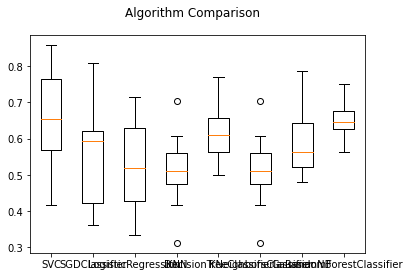

[array([0.8125    , 0.78888889, 0.85714286, 0.6875    , 0.60416667,
        0.66666667, 0.63888889, 0.55555556, 0.41666667, 0.55208333]),
 array([0.60416667, 0.44444444, 0.72619048, 0.60416667, 0.41666667,
        0.80952381, 0.36111111, 0.38888889, 0.58333333, 0.625     ]),
 array([0.58333333, 0.34444444, 0.71428571, 0.64583333, 0.41666667,
        0.52380952, 0.51388889, 0.33333333, 0.45833333, 0.66666667]),
 array([0.5625    , 0.47222222, 0.60714286, 0.52083333, 0.3125    ,
        0.70238095, 0.41666667, 0.55555556, 0.47916667, 0.5       ]),
 array([0.5625    , 0.61111111, 0.75      , 0.5625    , 0.5       ,
        0.60714286, 0.625     , 0.55555556, 0.77083333, 0.66666667]),
 array([0.5625    , 0.47222222, 0.60714286, 0.52083333, 0.3125    ,
        0.70238095, 0.41666667, 0.55555556, 0.47916667, 0.5       ]),
 array([0.5625    , 0.75555556, 0.78571429, 0.5625    , 0.47916667,
        0.66666667, 0.56944444, 0.55555556, 0.5       , 0.51041667]),
 array([0.625     , 0.72777778, 0.

In [ ]:
# function to perfrom cross validation


from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import time
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import balanced_accuracy_score
from collections import Counter
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.svm import SVC
from sklearn import metrics, model_selection, svm
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, VotingClassifier)
from sklearn.metrics import log_loss, fbeta_score, make_scorer, confusion_matrix, roc_curve

def eve_clf():
    start = time.time()
    X,y = X_train_pca, y_train
    #X_tr, X_ts, y_tr, y_ts = train_test_split(X,y, test_size=0.3, random_state=11,stratify=y, shuffle = True)

    #print("shape of y_tr is:",Counter(y_tr))
    num_folds = 10
    scoring = "balanced_accuracy"
    # Spot Check Algorithms
    models = []
    models.append(('SVC', SVC()))
    models.append(('SGDClassifier', SGDClassifier()))
    models.append(('LogisticRegression', LogisticRegression()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
    models.append(('KNeighborsClassifier', KNeighborsClassifier()))
    models.append(('GaussianNB', GaussianNB()))
    models.append(('RandomForestClassifier', RandomForestClassifier()))


    results = []
    names = []
    seed = 7
    for name, model in models:
        kfold = model_selection.KFold(n_splits=num_folds,random_state =seed)
        cv_results = cross_val_score(model, X, y, cv=kfold,scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f" % (name, cv_results.mean())
        print(msg)

    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()
    return results
    
eve_clf()
    



# Hyper parameter tuning of SVC

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# define dataset
X, y = X_train_pca,y_train
# define model and parameters
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [20,15,5, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='balanced_accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.692593 using {'C': 5, 'gamma': 'scale', 'kernel': 'rbf'}
0.683333 (0.097447) with: {'C': 20, 'gamma': 'scale', 'kernel': 'poly'}
0.687037 (0.079198) with: {'C': 20, 'gamma': 'scale', 'kernel': 'rbf'}
0.540741 (0.091774) with: {'C': 20, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.677778 (0.095581) with: {'C': 15, 'gamma': 'scale', 'kernel': 'poly'}
0.687037 (0.079198) with: {'C': 15, 'gamma': 'scale', 'kernel': 'rbf'}
0.522222 (0.103040) with: {'C': 15, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.659259 (0.100137) with: {'C': 5, 'gamma': 'scale', 'kernel': 'poly'}
0.692593 (0.080805) with: {'C': 5, 'gamma': 'scale', 'kernel': 'rbf'}
0.535185 (0.113387) with: {'C': 5, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.655556 (0.098758) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.688889 (0.080635) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.520370 (0.093496) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.546296 (0.125120) with: {'C': 1.0, 'gamma': 'scale', 'kernel': '

Tuning of LR

In [ ]:

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = X_train_pca,y_train
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [20,15,5, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.644583 using {'C': 20, 'penalty': 'l2', 'solver': 'newton-cg'}
0.644583 (0.112891) with: {'C': 20, 'penalty': 'l2', 'solver': 'newton-cg'}
0.644583 (0.112891) with: {'C': 20, 'penalty': 'l2', 'solver': 'lbfgs'}
0.592639 (0.112904) with: {'C': 20, 'penalty': 'l2', 'solver': 'liblinear'}
0.631667 (0.105867) with: {'C': 15, 'penalty': 'l2', 'solver': 'newton-cg'}
0.631667 (0.105867) with: {'C': 15, 'penalty': 'l2', 'solver': 'lbfgs'}
0.590417 (0.113075) with: {'C': 15, 'penalty': 'l2', 'solver': 'liblinear'}
0.605556 (0.095751) with: {'C': 5, 'penalty': 'l2', 'solver': 'newton-cg'}
0.605556 (0.095751) with: {'C': 5, 'penalty': 'l2', 'solver': 'lbfgs'}
0.577778 (0.108836) with: {'C': 5, 'penalty': 'l2', 'solver': 'liblinear'}
0.623194 (0.103853) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.623194 (0.103853) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.584306 (0.114335) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.533194 (0.107446) with: {'C': 1.0,

Plotting Validation Curve

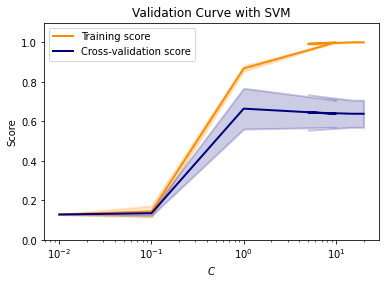

In [ ]:
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_iris
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

X,y = X_train_pca,y_train
param_range = [20,15,5, 10, 1.0, 0.1, 0.01]

train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name="C", param_range=param_range,
    scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel(r"$C$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

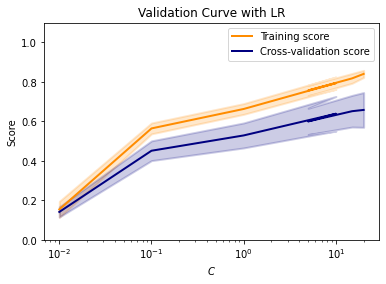

In [ ]:
from sklearn.model_selection import validation_curve
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

X,y = X_train_pca,y_train
param_range = [20,15,5, 10, 1.0, 0.1, 0.01]

train_scores, test_scores = validation_curve(
    LogisticRegression(), X, y, param_name="C", param_range=param_range,
    scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with LR")
plt.xlabel(r"$C$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

Plotting Learning curve

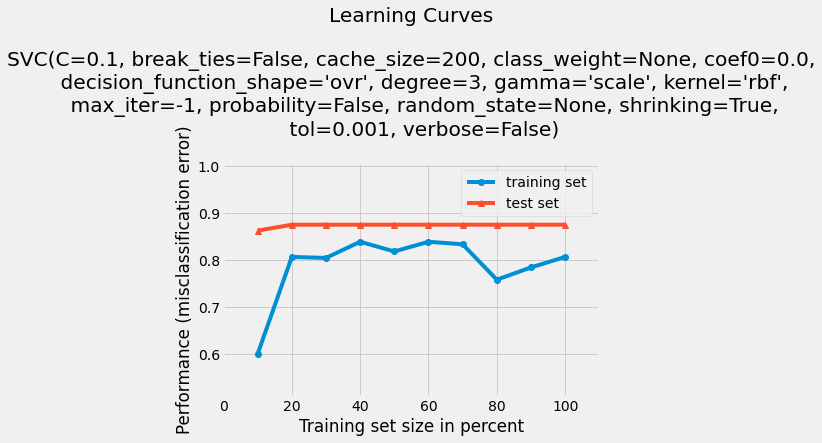

In [ ]:
from mlxtend.plotting import plot_learning_curves
import matplotlib.pyplot as plt
from mlxtend.data import iris_data
from mlxtend.preprocessing import shuffle_arrays_unison
from sklearn.svm import SVC
import numpy as np


# Loading some example data
X_train, X_test = X_train_pca,X_val_pca
y_tr, y_test = y_train,y_val

clf = SVC(C=.1, gamma= 'scale', kernel='rbf')

plot_learning_curves(X_train, y_tr, X_test, y_test, clf)
plt.show()

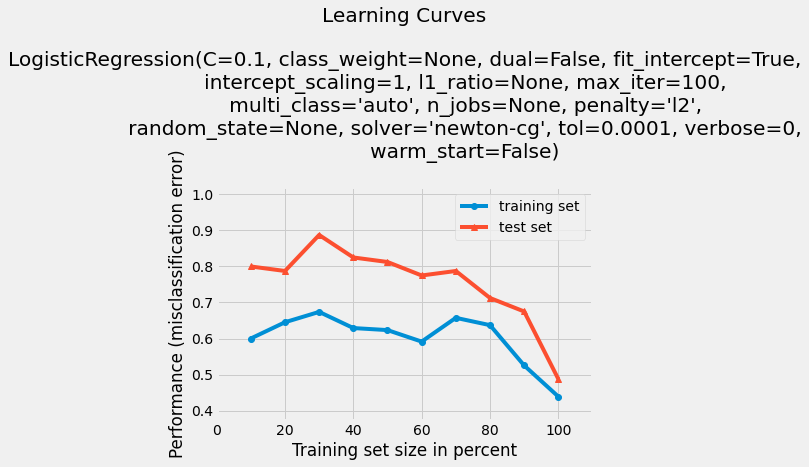

In [ ]:
from mlxtend.plotting import plot_learning_curves
import matplotlib.pyplot as plt
from mlxtend.data import iris_data
from mlxtend.preprocessing import shuffle_arrays_unison
from sklearn.linear_model import LogisticRegression
import numpy as np


# Loading some example data
X_train, X_test = X_train_pca,X_val_pca
y_tr, y_test = y_train,y_val

clf = LogisticRegression(C= .1, penalty= 'l2', solver= 'newton-cg')

plot_learning_curves(X_train, y_tr, X_test, y_test, clf )
plt.show()

Training on final model

In [ ]:
# concatingnating train and validation data
import numpy as np
X_final_train = np.concatenate([X_train_pca,X_val_pca])
X_final_train.shape
y_final_train = np.concatenate([y_train,y_val])

**Logistic regression**

In [ ]:
lr = LogisticRegression(C= .1, penalty= 'l2', solver= 'newton-cg')
lr.fit(X_final_train,y_final_train)
y_pred_lr = lr.predict(X_final_test_pca)

In [ ]:
print("Accuracy on overall test set is:", metrics.accuracy_score(y_final_test,y_pred_lr))

Accuracy on overall test set is: 0.46835443037974683


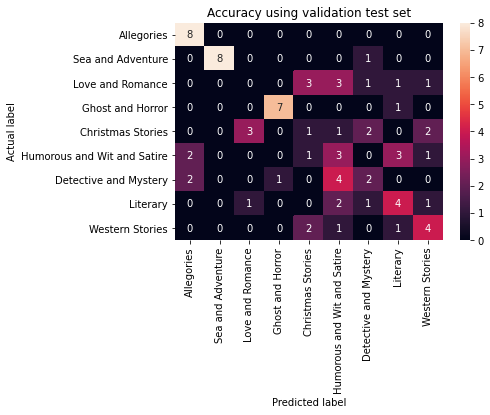

In [ ]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_final_test, y_pred_lr)
sns.heatmap(cm, annot=True , xticklabels=train_data.genre.unique(), yticklabels=train_data.genre.unique())
plt.title('Accuracy using validation test set'.format(accuracy_score(y_final_test, y_pred_lr)))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
print(classification_report(y_final_test, y_pred_lr))

                             precision    recall  f1-score   support

                 Allegories       0.67      1.00      0.80         8
          Christmas Stories       1.00      0.89      0.94         9
      Detective and Mystery       0.00      0.00      0.00         9
           Ghost and Horror       0.88      0.88      0.88         8
Humorous and Wit and Satire       0.14      0.11      0.12         9
                   Literary       0.21      0.30      0.25        10
           Love and Romance       0.29      0.22      0.25         9
          Sea and Adventure       0.40      0.44      0.42         9
            Western Stories       0.44      0.50      0.47         8

                   accuracy                           0.47        79
                  macro avg       0.45      0.48      0.46        79
               weighted avg       0.44      0.47      0.45        79



**LR with weights**

In [ ]:
lr = LogisticRegression(class_weight='balanced',C= .1, penalty= 'l2', solver= 'newton-cg')
lr.fit(X_final_train,y_final_train)
y_pred_lr = lr.predict(X_final_test_pca)

In [ ]:
print("Accuracy on overall test set is:", metrics.accuracy_score(y_final_test,y_pred_lr))

Accuracy on overall test set is: 0.5189873417721519


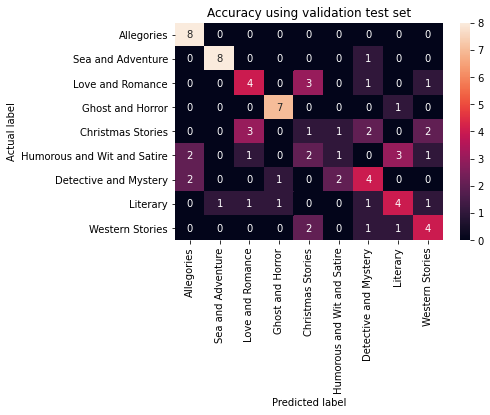

In [ ]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_final_test, y_pred_lr)
sns.heatmap(cm, annot=True , xticklabels=train_data.genre.unique(), yticklabels=train_data.genre.unique())
plt.title('Accuracy using validation test set'.format(accuracy_score(y_final_test, y_pred_lr)))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
print(classification_report(y_final_test, y_pred_lr))

                             precision    recall  f1-score   support

                 Allegories       0.67      1.00      0.80         8
          Christmas Stories       0.89      0.89      0.89         9
      Detective and Mystery       0.44      0.44      0.44         9
           Ghost and Horror       0.78      0.88      0.82         8
Humorous and Wit and Satire       0.12      0.11      0.12         9
                   Literary       0.25      0.10      0.14        10
           Love and Romance       0.40      0.44      0.42         9
          Sea and Adventure       0.44      0.44      0.44         9
            Western Stories       0.44      0.50      0.47         8

                   accuracy                           0.52        79
                  macro avg       0.49      0.53      0.51        79
               weighted avg       0.49      0.52      0.49        79



**SVM**

In [ ]:
from sklearn.svm import SVC
lr = SVC(C=.1, gamma= 'scale', kernel='rbf')
lr.fit(X_final_train,y_final_train)
y_pred_lr = lr.predict(X_final_test_pca)

In [ ]:
print("Accuracy on overall test set is:", metrics.accuracy_score(y_final_test,y_pred_lr))

Accuracy on overall test set is: 0.20253164556962025


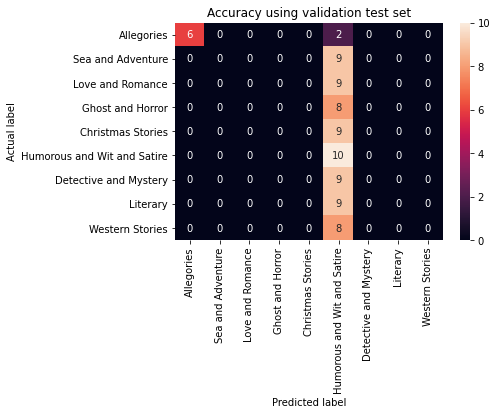

In [ ]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_final_test, y_pred_lr)
sns.heatmap(cm, annot=True , xticklabels=train_data.genre.unique(), yticklabels=train_data.genre.unique())
plt.title('Accuracy using validation test set'.format(accuracy_score(y_final_test, y_pred_lr)))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
print(classification_report(y_final_test, y_pred_lr))

                             precision    recall  f1-score   support

                 Allegories       1.00      0.75      0.86         8
          Christmas Stories       0.00      0.00      0.00         9
      Detective and Mystery       0.00      0.00      0.00         9
           Ghost and Horror       0.00      0.00      0.00         8
Humorous and Wit and Satire       0.00      0.00      0.00         9
                   Literary       0.14      1.00      0.24        10
           Love and Romance       0.00      0.00      0.00         9
          Sea and Adventure       0.00      0.00      0.00         9
            Western Stories       0.00      0.00      0.00         8

                   accuracy                           0.20        79
                  macro avg       0.13      0.19      0.12        79
               weighted avg       0.12      0.20      0.12        79



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#SVM with balanced class weights

In [ ]:
from sklearn.svm import SVC
lr = SVC(C=5, gamma= 'scale', kernel='rbf', class_weight = 'balanced')
lr.fit(X_final_train,y_final_train)
y_pred_lr = lr.predict(X_final_test_pca)

In [ ]:
print("Accuracy on overall test set is:", metrics.accuracy_score(y_final_test,y_pred_lr))

Accuracy on overall test set is: 0.6582278481012658


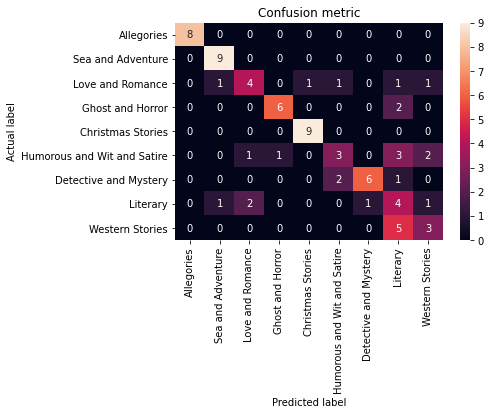

In [ ]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_final_test, y_pred_lr)
sns.heatmap(cm, annot=True , xticklabels=train_data.genre.unique(), yticklabels=train_data.genre.unique())
plt.title('Confusion metric'.format(accuracy_score(y_final_test, y_pred_lr)))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
print(classification_report(y_final_test, y_pred_lr))

                             precision    recall  f1-score   support

                 Allegories       1.00      1.00      1.00         8
          Christmas Stories       0.82      1.00      0.90         9
      Detective and Mystery       0.57      0.44      0.50         9
           Ghost and Horror       0.86      0.75      0.80         8
Humorous and Wit and Satire       0.90      1.00      0.95         9
                   Literary       0.50      0.30      0.37        10
           Love and Romance       0.86      0.67      0.75         9
          Sea and Adventure       0.25      0.44      0.32         9
            Western Stories       0.43      0.38      0.40         8

                   accuracy                           0.66        79
                  macro avg       0.69      0.66      0.67        79
               weighted avg       0.68      0.66      0.66        79



Plotting learning curve of SVM after combing traing and validation data as final training data and testing on independent test data

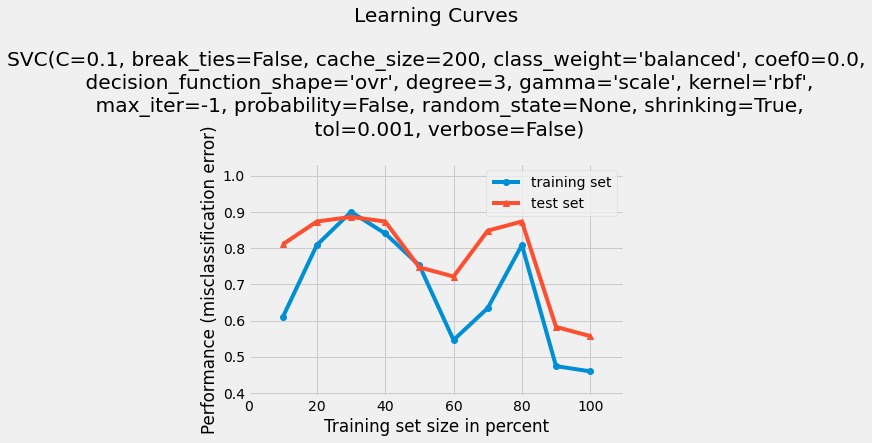

In [ ]:
from mlxtend.plotting import plot_learning_curves
import matplotlib.pyplot as plt
from mlxtend.data import iris_data
from mlxtend.preprocessing import shuffle_arrays_unison
from sklearn.svm import SVC
import numpy as np


# Loading some example data
X_train, X_test = X_final_train,X_final_test_pca
y_tr, y_test = y_final_train,y_final_test

clf = SVC(C=.1, gamma= 'scale', kernel='rbf', class_weight='balanced') # with C==.1 as to avoid overfitting

plot_learning_curves(X_train, y_tr, X_test, y_test, clf)
plt.show()

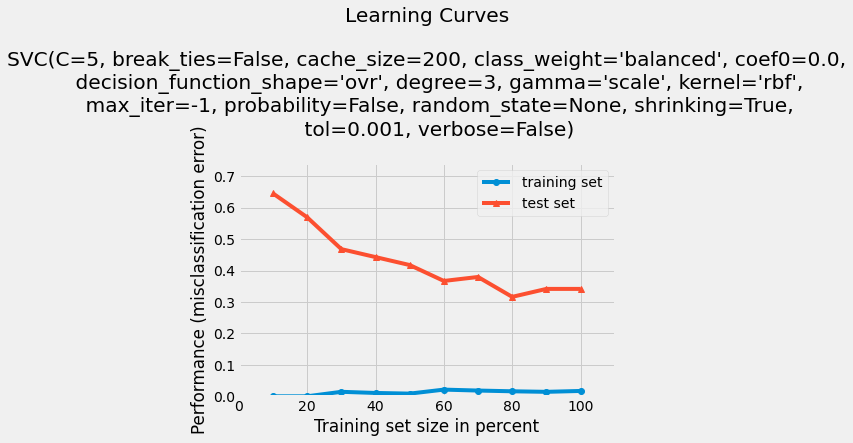

In [ ]:
from mlxtend.plotting import plot_learning_curves
import matplotlib.pyplot as plt
from mlxtend.data import iris_data
from mlxtend.preprocessing import shuffle_arrays_unison
from sklearn.svm import SVC
import numpy as np


# Loading some example data
X_train, X_test = X_final_train,X_final_test_pca
y_tr, y_test = y_final_train,y_final_test

clf = SVC(C=5, gamma= 'scale', kernel='rbf', class_weight='balanced') # with C=5 with overfitting

plot_learning_curves(X_train, y_tr, X_test, y_test, clf)
plt.show()